# Coronavirus Database Analysis

- WordCloud EDA

- Transmission Mode Analysis:
    - Heirarchichal clustering
        1. Word Count feature engineering Method
        2. Frequency of Word count normalize feature engineering Method
    - K Means clustering
        1. Word Count feature engineering Method
        2. Frequency of Word count normalize feature engineering Method


- Symptoms Analysis:
    - Heirarchical clustering
        1. Word Count feature engineering Method
        2. Frequency of Word count normalize feature engineering Method
    - K Means clustering
        1. Word Count feature engineering Method
        2. Frequency of Word count normalize feature engineering Method


- Final Conclusion

References:

- https://www.guru99.com/unsupervised-machine-learning.html
- https://www.webmd.com/lung/coronavirus#9-16
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
- https://stackabuse.com/k-means-clustering-with-scikit-learn/
- https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
- https://www.statistics.com/glossary/wards-linkage/


In [1]:
# Instal and Import Libraries
!pip install regex
!pip install wordcloud
!pip install nltk

import csv
import random
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
from wordcloud import WordCloud
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

from wordcloud import WordCloud
from collections import Counter

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading csv file
df = pd.read_csv('metadata.csv', low_memory=False)
df.info(verbose=True)
df.head()
df_copy = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

In [3]:
# load the meta data from the CSV file and extract out fields that will be useful to our application
# The 'journal' column is also added incase used further

df = df_copy[['title','abstract','authors','publish_time','journal']]
df = df.drop_duplicates(subset='abstract', keep="first")
df=df.dropna()
df["abstract"] = df["abstract"].str.lower()
df.head()

,title,abstract,authors,publish_time,journal
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,Respir Res
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,Respir Res
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,Respir Res
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,Respir Res


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294599 entries, 0 to 497904
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         294599 non-null  object
 1   abstract      294599 non-null  object
 2   authors       294599 non-null  object
 3   publish_time  294599 non-null  object
 4   journal       294599 non-null  object
dtypes: object(5)
memory usage: 13.5+ MB


In [5]:
df.isnull().sum()

title           0
abstract        0
authors         0
publish_time    0
journal         0
dtype: int64

In [6]:
df.describe()

,title,abstract,authors,publish_time,journal
count,294599,294599,294599,294599,294599
unique,263790,293833,258970,7058,29891
top,Conclusion,background and objectives: in the last months ...,"Anonymous,",2020,bioRxiv
freq,34,3,546,85369,4740


In [7]:
df_eda = df.copy()
df_eda['date_time'] = pd.to_datetime(df_eda['publish_time'])

In [8]:
df_eda['year'] = pd.DatetimeIndex(df_eda['date_time']).year
df_eda.head()

,title,abstract,authors,publish_time,journal,date_time,year
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,BMC Infect Dis,2001-07-04,2001
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,Respir Res,2000-08-15,2000
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,Respir Res,2000-08-25,2000
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,Respir Res,2001-02-22,2001
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,Respir Res,2001-05-11,2001


In [9]:
df_eda_group = df_eda.groupby(['year']).size().reset_index(name="total_publication")
df_eda_group

,year,total_publication
0,1952,1
1,1955,2
2,1956,1
3,1957,1
4,1962,1
...,...,...
59,2018,6618
60,2019,7669
61,2020,171921
62,2021,44564


In [10]:
print(np.mean(df_eda_group['total_publication']))
print(np.median(df_eda_group['total_publication']))

4603.109375
183.0


In [11]:
df_eda_group = df_eda_group[df_eda_group['total_publication'] > 183]

Text(0, 0.5, 'Total publication')

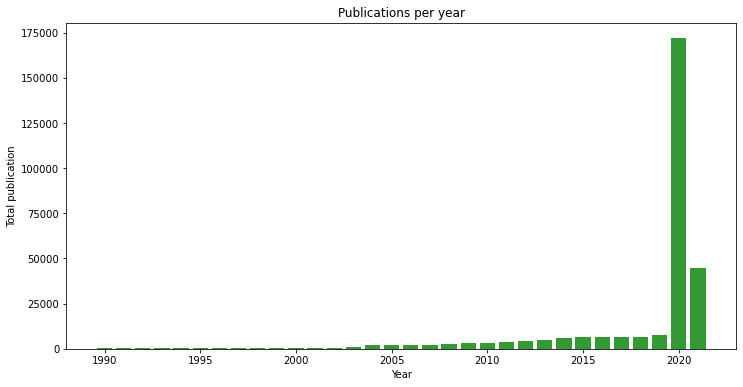

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df_eda_group['year'], df_eda_group['total_publication'], color='green', alpha=0.8)
plt.title('Publications per year')
plt.xlabel('Year')
plt.ylabel('Total publication')

It is observed that the data is clear with no null elements. Moreover, most of the research papers are published in the recent year 2020 which implies that most of the paper discusses about the COVID-19. 

The wordcloud of the abstract is analysed to see the occurences of words in the dataset. 

# Wordcloud EDA

In [13]:
# tokenizing the tweet and removing the stopwords
stop = stopwords.words('english')
text_analyse = df['abstract'].apply(lambda x: [item for item in x.split() if item not in stop])

In [14]:
text_analyse = text_analyse.str.join(' ')

In [15]:
text_analyse.head()

0    objective: retrospective chart review describe...
1    inflammatory diseases respiratory tract common...
2    surfactant protein-d (sp-d) participates innat...
3    endothelin-1 (et-1) 21 amino acid peptide dive...
4    respiratory syncytial virus (rsv) pneumonia vi...
Name: abstract, dtype: object

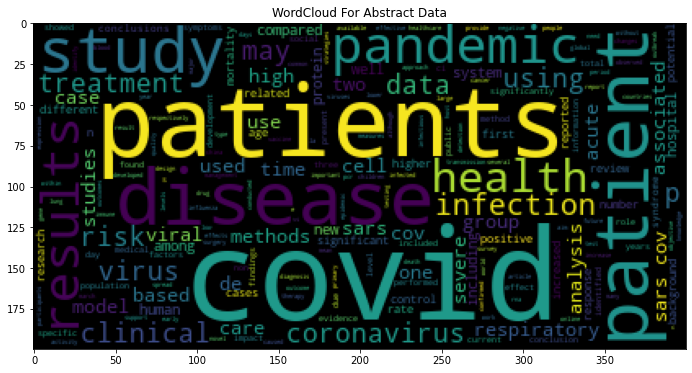

In [16]:
wc = WordCloud()

counts_all = Counter()

for line in text_analyse:  # Here you can also use the Cursor
    counts_line = wc.process_text(line)
    counts_all.update(counts_line)

wc.generate_from_frequencies(counts_all)
plt.figure(figsize=(18,6))
plt.title('WordCloud For Abstract Data')
plt.imshow(wc)

It is observed from the wordcloud that the words like patients, disease, covid, pandemic, study, health, clinical, respiratory are used more frequent. 

The words like covid, disease, patients, study, pandemic infers that the abstract mainly discusses about the study of the pandemic diseases like covid and how it impacts the patients. 

The words like methods, treatment, infection, clinical, respiratory, etc. infers that the abstract mentions some of the impacts of coronavirus like its symptoms, modes of transmission, infection rate, risk factor and other things. 

Based on this wordcloud, it is suggested to analyse the modes of transmission and symptoms for the coronavirus based on the data of abstract. 

# Transmission modes analysis

The common ways of transmission that are researched based on the online sources are mentioned in the list below:

Transmission modes:
- droplet
- aerosol
- direct contact
- indirect contact
- close contact
- human contact
- human transmission
- community spread
- community transmission
- animal transmission
- airborne
- fomite
- fecal-oral
- bloodborne
- mother-to-child
- animal-to-human

In [17]:
transmission = ['droplet', 'aerosol', 'direct contact', 'indirect contact', 'close contact', 'human contact',
                'human transmission', 'community spread', 'community transmission', 'animal transmission', 
                'airborne', 'fomite', 'fecal-oral', 'bloodborne', 'mother-to-child', 'animal-to-human']

{'droplet': 0, 'aerosol': 0, 'direct contact': 0, 'indirect contact': 0, 'close contact': 0, 'human contact': 0, 'human transmission': 0, 'community spread': 0, 'community transmission': 0, 'animal transmission': 0, 'airborne': 0, 'fomite': 0, 'fecal-oral': 0, 'bloodborne': 0, 'mother-to-child': 0, 'animal-to-human': 0}
{'droplet': 2939, 'aerosol': 4173, 'direct contact': 824, 'indirect contact': 141, 'close contact': 1726, 'human contact': 183, 'human transmission': 896, 'community spread': 305, 'community transmission': 757, 'animal transmission': 43, 'airborne': 1690, 'fomite': 392, 'fecal-oral': 204, 'bloodborne': 28, 'mother-to-child': 69, 'animal-to-human': 77}


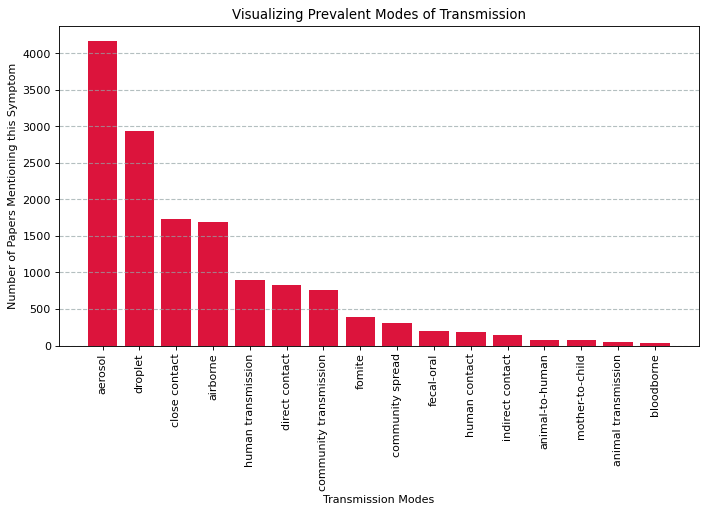

In [18]:
transmission_count = dict((transm,0) for transm in transmission)

print(transmission_count)

for transm in transmission_count:
    for abstract in df['abstract']:
        if str(transm) in abstract:
            transmission_count[transm] += 1


print(transmission_count)
transmission_count = dict(sorted(transmission_count.items(), key=lambda kv: kv[1], reverse=True))

loc = np.arange(len(transmission_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(transmission_count.keys(),transmission_count.values(), color=('crimson'))
ax.set_xticklabels(transmission_count.keys(), rotation=90)

ax.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Symptom')
ax.set_xlabel('Transmission Modes')
ax.set_title('Visualizing Prevalent Modes of Transmission')
plt.show()

**Aerosol and droplet** which are spread through sneezing and coughing are prevalent modes of coronavirus transmission. 

In [19]:
transmission_ct = []
for key, value in transmission_count.items():
    temp = [key,value]
    transmission_ct.append(temp)

In [20]:
transmission_df = pd.DataFrame.from_dict(transmission_count, orient='index')

In [21]:
print('Mean: ', np.mean(transmission_df.values))
print('Median: ', np.median(transmission_df.values))

Mean:  902.9375
Median:  348.5


In [22]:
# Keeping the values and labels with more than 300 counts
transmission_df = transmission_df[(transmission_df.values > 300)]

In [23]:
transmission_df

,0
aerosol,4173
droplet,2939
close contact,1726
airborne,1690
human transmission,896
direct contact,824
community transmission,757
fomite,392
community spread,305


## Heirarchical Clustering

### 1 - Word Count List

This is one of the feature engineering technique. In this method, the list of the labels and its count is directly used to find the linkage between each labels using the ward's linkage method. The distance matrix is calculated using the scipy library. 

Ward´s linkage is a method for hierarchical cluster analysis. The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster. Ward´s Method seeks to choose the successive clustering steps so as to minimize the increase in ESS at each step.

https://www.statistics.com/glossary/wards-linkage/


In [24]:
transmission_df.index

Index(['aerosol', 'droplet', 'close contact', 'airborne', 'human transmission',
       'direct contact', 'community transmission', 'fomite',
       'community spread'],
      dtype='object')

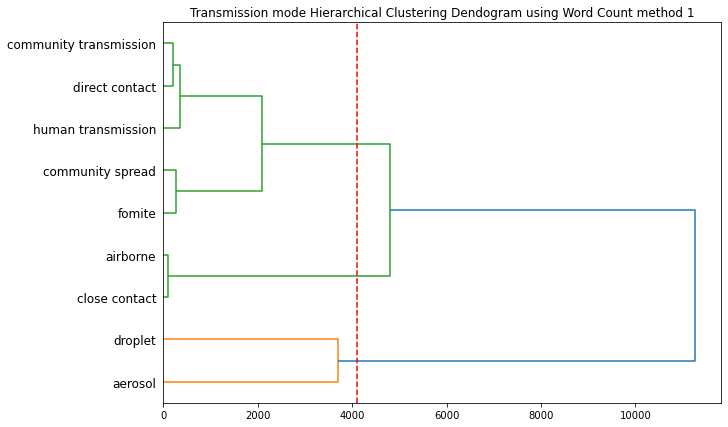

In [25]:
trans_dist = distance_matrix(transmission_df.values, transmission_df.values)
linked = linkage(trans_dist, 'ward')

labelList = transmission_df.index

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axvline(x=4100, color='r', linestyle='--')
plt.title("Transmission mode Hierarchical Clustering Dendogram using Word Count method 1")
plt.show()

The 3 clusters are made based on the above dendogram

In [26]:
# Here Agglomerative clustering is used as Heirarchical clustering method
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(trans_dist)

array([0, 0, 2, 2, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Transmission mode scatter plot for Hierarchical clustering method 1')

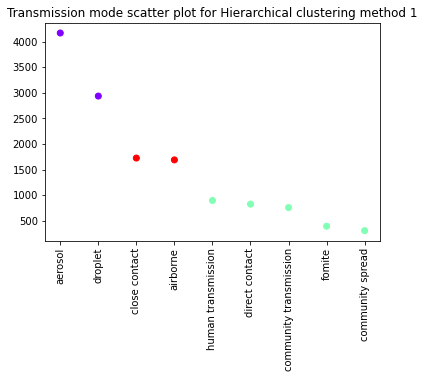

In [27]:
plt.scatter(transmission_df.index,transmission_df.values, c=cluster.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Transmission mode scatter plot for Hierarchical clustering method 1")

Based on the 1st method, the 3 clusters are observed. 

**Cluster 1**: Aerosol and droplet

**Cluster 2**: Close contact and airborne

**Cluster 3**: Human transmission, direct contact, community transmission, fomite and community spread

It does not show any similarities between the elements of cluster as it is soleley based on the total number of occurences. 

### 2 - Word Frequency count normalize Method 

This is one of the feature engineering technique. In this method, the frequency of the given word is cound within the given abstract and is divided by the total number of words in that particular abstract. The dataframe is developed for this normalized word frequency count method. 

In [28]:
tm_ct = dict((transm,0) for transm in transmission_df.index)
df_transm = df.copy()

print(tm_ct)

for transm in tm_ct:
    freq_count = []
    for abstract in df['abstract']:
        freq_str = len(re.findall(str(transm), abstract))
        freq_abst = len(abstract.split())
        freq_count.append((freq_str/freq_abst))
            
    df_transm[transm] = freq_count

{'aerosol': 0, 'droplet': 0, 'close contact': 0, 'airborne': 0, 'human transmission': 0, 'direct contact': 0, 'community transmission': 0, 'fomite': 0, 'community spread': 0}


In [29]:
df_transm.head()

,title,abstract,authors,publish_time,journal,aerosol,droplet,close contact,airborne,human transmission,direct contact,community transmission,fomite,community spread
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,BMC Infect Dis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,Respir Res,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,Respir Res,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,Respir Res,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,Respir Res,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_transmission = df_transm.drop(['title', 'abstract', 'authors', 'publish_time', 'journal'], axis=True)

In [31]:
df_transmission

,aerosol,droplet,close contact,airborne,human transmission,direct contact,community transmission,fomite,community spread
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
497896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pairwise_distances method from the scikit-learn is used to calculate the distance matrix for this method. Then the linkage ward mehtod is used for the clustering.  

In [32]:
dist2 = pairwise_distances(df_transmission.T, metric = 'cosine')
linkage_matrix = ward(dist2)

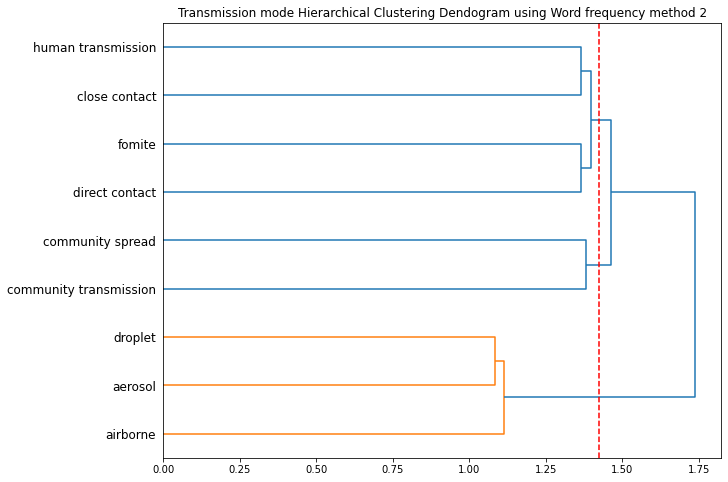

In [33]:
labelList = df_transmission.columns.values

plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axvline(x=1.425, color='r', linestyle='--')
plt.title("Transmission mode Hierarchical Clustering Dendogram using Word frequency method 2")
plt.show()

The 3 clusters are made based on the above dendogram

In [34]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist2)

array([1, 1, 0, 1, 0, 0, 2, 0, 2])

Text(0.5, 1.0, 'Transmission mode scatter plot for Heirarchical clustering method 2')

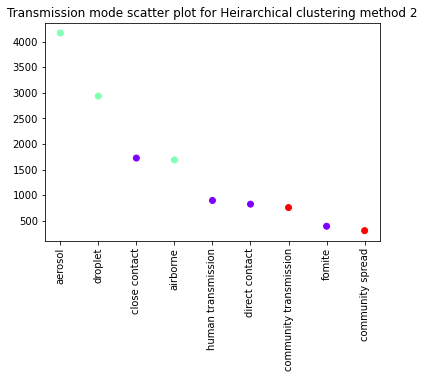

In [35]:
plt.scatter(transmission_df.index,transmission_df.values, c=cluster.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Transmission mode scatter plot for Heirarchical clustering method 2")

Based on 2nd method, it is observed that it makes more sense and insights.

**Cluster 1**: Droplets, aerosols and airborne which are spread through air are clustered together. These are modes of air transmission clustered together. It makes sense as the virus spread more frequently during sneezing and coughing.  According to this, the use of **masks and sanitization** are useful to prevent the transmission of COVID. 

**Cluster 2**: Community spread and community transmission which are caused through entire community are clustered together. Based on this, the implementation of **social distancing and lockdowns** are helpful in preventing the spread of COVID. 

**Cluster 3**: Human transmission, close contact, direct contact, fomite are contact type transmission clustered together. Based on this also, the **social distancing** seems to be helpful.  

## K Means clustering

### 1 - Word count list

The total word count list feature method was used for K means clustering. 

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(trans_dist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
print(kmeans.cluster_centers_)

[[3538.2 2304.2 1091.2 1055.2  261.2  218.   204.6  277.6  329.8]
 [ 617.   617.  1830.  1866.  2660.  2732.  2799.  3164.  3251. ]
 [2465.  1231.    18.    18.   812.   884.   951.  1316.  1403. ]]


In [38]:
print(kmeans.labels_)

[1 1 2 2 0 0 0 0 0]


Text(0.5, 1.0, 'Transmission mode scatter plot for K Means clustering method 1')

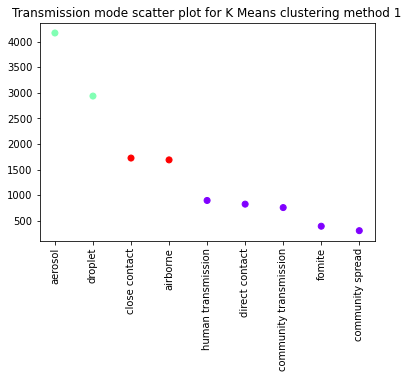

In [39]:
plt.scatter(transmission_df.index,transmission_df.values, c=kmeans.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Transmission mode scatter plot for K Means clustering method 1")

Here, with 1st method, K means clustering gives the same result which is solely based on the total word count. 

### 2 - Word frequency count Normalize method

The another feature engineering method is used that count the probability of the word occuring in particular abstract. 

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dist2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
print(kmeans.cluster_centers_)

[[0.97625662 0.95067046 0.64423426 0.96785335 0.64791992 0.97344072
  0.99203424 0.64878778 0.9973434 ]
 [0.99698061 0.99409269 0.99341817 0.99756725 0.99615111 0.99632685
  0.48798028 0.99449717 0.48798028]
 [0.6182461  0.61711676 0.9720637  0.63083235 0.97849077 0.70197138
  0.9953675  0.95061139 0.99711621]]


In [42]:
print(kmeans.labels_)

[2 2 0 2 0 2 1 0 1]


Text(0.5, 1.0, 'Trasmission mode scatter plot for K Means clustering method 2')

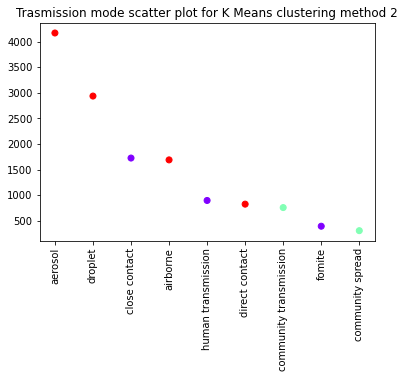

In [43]:
plt.scatter(transmission_df.index,transmission_df.values, c=kmeans.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Trasmission mode scatter plot for K Means clustering method 2")

It is seen that the K means clustering gives the same result as the Agglomerative clustering with the number of clusters 3. 

# Symptoms analysis

The list of symptoms are researched on internet online database and is mentioned below: 

Coronavirus Most common symptoms:
- fever
- cold
- pneumonia
- cough/dry cough
- tiredness
- fatigue

Coronavirus Less common symptoms:
- congestion
- nausea
- body aches
- aches and pains
- sore throat
- diarrhea
- conjunctivitis
- headache
- loss of taste or smell
- a rash on skin, or discolouration of fingers or toes

Coronavirus Serious symptoms:
- difficulty breathing or shortness of breath
- chest pain
- loss of speech or movement

In [44]:
symptoms = ['fever', 'cold', 'pneumonia', 'dry cough', 'cough', 'tiredness', 'fatigue', 'congestion', 'nausea', 
            'body aches', 'aches', 'pain', 'sore throat', 'diarrhea', 'conjunctivitis', 'headache', 
            'loss of taste', 'loss of smell', 'a rash on skin', 'discolouration of fingers or toes', 
            'difficulty breathing', 'shortness of breath', 'chest pain', 'loss of speech', 'loss of movement']


{'fever': 0, 'cold': 0, 'pneumonia': 0, 'dry cough': 0, 'cough': 0, 'tiredness': 0, 'fatigue': 0, 'congestion': 0, 'nausea': 0, 'body aches': 0, 'aches': 0, 'pain': 0, 'sore throat': 0, 'diarrhea': 0, 'conjunctivitis': 0, 'headache': 0, 'loss of taste': 0, 'loss of smell': 0, 'a rash on skin': 0, 'discolouration of fingers or toes': 0, 'difficulty breathing': 0, 'shortness of breath': 0, 'chest pain': 0, 'loss of speech': 0, 'loss of movement': 0}
{'fever': 10916, 'cold': 2096, 'pneumonia': 15828, 'dry cough': 955, 'cough': 7003, 'tiredness': 101, 'fatigue': 2708, 'congestion': 573, 'nausea': 1035, 'body aches': 58, 'aches': 12927, 'pain': 9935, 'sore throat': 984, 'diarrhea': 4052, 'conjunctivitis': 499, 'headache': 1948, 'loss of taste': 200, 'loss of smell': 314, 'a rash on skin': 1, 'discolouration of fingers or toes': 1, 'difficulty breathing': 78, 'shortness of breath': 1495, 'chest pain': 614, 'loss of speech': 3, 'loss of movement': 2}


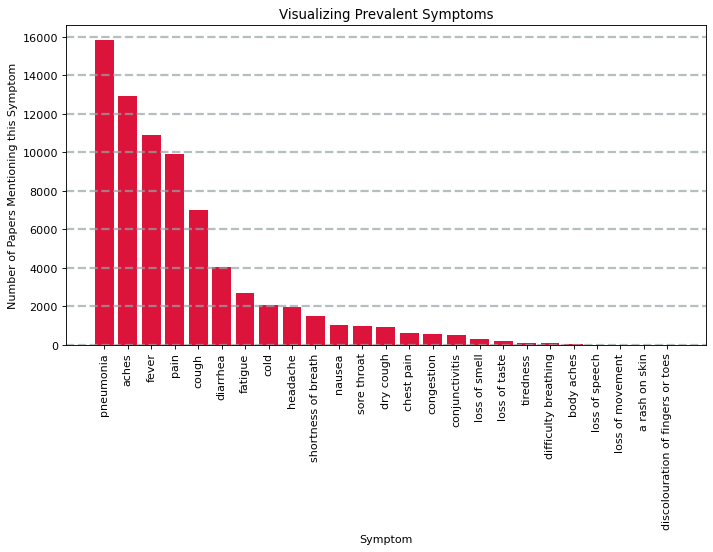

In [45]:
symptom_count = dict((symptom,0) for symptom in symptoms)

print(symptom_count)

for symptom in symptom_count:
    for abstract in df['abstract']:
        if str(symptom) in abstract:
            symptom_count[symptom] += 1


print(symptom_count)
symptom_count = dict(sorted(symptom_count.items(), key=lambda kv: kv[1], reverse=True))

loc = np.arange(len(symptom_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(symptom_count.keys(),symptom_count.values(), color=('crimson'))
ax.set_xticklabels(symptom_count.keys(), rotation=90)

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Symptom')
ax.set_xlabel('Symptom')
ax.set_title('Visualizing Prevalent Symptoms')
plt.show()

Pneumonia, aches, fever, pain and cough are the prevailent symptoms for coronavirus which has number of occurence more than the mean of the plot. 

In [46]:
symptom_ct = []
for key, value in symptom_count.items():
    temp = [key,value]
    symptom_ct.append(temp)

In [47]:
symptom_df = pd.DataFrame.from_dict(symptom_count, orient='index')

In [48]:
print('Mean: ', np.mean(symptom_df.values))
print('Median: ', np.median(symptom_df.values))

Mean:  2973.04
Median:  955.0


In [49]:
# Considering symptoms which occured more than 300 times only
symptom_df = symptom_df[(symptom_df.values > 300)]

In [50]:
symptom_df

,0
pneumonia,15828
aches,12927
fever,10916
pain,9935
cough,7003
diarrhea,4052
fatigue,2708
cold,2096
headache,1948
shortness of breath,1495


In [51]:
symptom_df.index

Index(['pneumonia', 'aches', 'fever', 'pain', 'cough', 'diarrhea', 'fatigue',
       'cold', 'headache', 'shortness of breath', 'nausea', 'sore throat',
       'dry cough', 'chest pain', 'congestion', 'conjunctivitis',
       'loss of smell'],
      dtype='object')

## Hierarchical clustering

### 1 - Word count Method

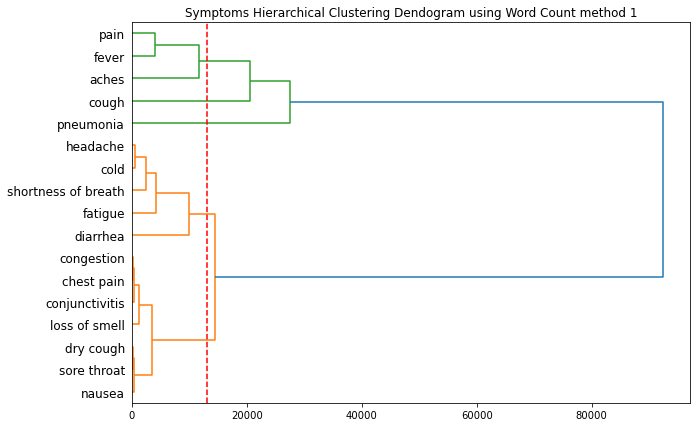

In [52]:
sympt_dist = distance_matrix(symptom_df.values, symptom_df.values)

linked = linkage(sympt_dist, 'ward')

labelList = symptom_df.index

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axvline(x=13000, color='r', linestyle='--')
plt.title("Symptoms Hierarchical Clustering Dendogram using Word Count method 1")
plt.show()

The 5 clusters are made based on the above dendogram

In [53]:
# Here the Agglomerative clustering is used for hierarchical clustering method
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(sympt_dist)

array([2, 0, 0, 0, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4])

Text(0.5, 1.0, 'Symptoms scatter plot for heirarchical clustering method 1')

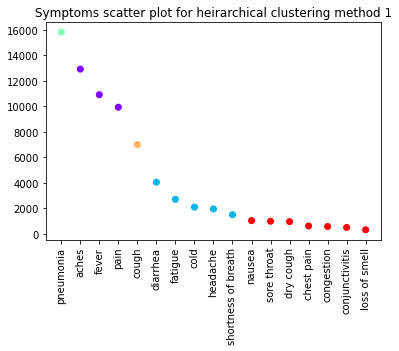

In [54]:
plt.scatter(symptom_df.index,symptom_df.values, c=cluster.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Symptoms scatter plot for heirarchical clustering method 1")

Using the 1st method of word count and distance matrix, the following clusters were observed. 

**Cluster 1**: Pain, fever, aches

**Cluster 2**: Cough

**Cluster 3**: Pneumonia

**Cluster 4**: Diarrhea, fatigue, cold, headache, shortness of breath

**Cluster 5**: Nausea, sore throat, dry cough, chest pain, congestion, conjunctivitis, loss of smell

### 2 - Word frequency count Normalize method

In [55]:
symt_ct = dict((st,0) for st in symptom_df.index)
df_sympt = df.copy()

print(symt_ct)

for st in symt_ct:
    freq_count = []
    for abstract in df['abstract']:
        freq_str = len(re.findall(str(st), abstract))
        freq_abst = len(abstract.split())
        freq_count.append((freq_str/freq_abst))
            
    df_sympt[st] = freq_count



{'pneumonia': 0, 'aches': 0, 'fever': 0, 'pain': 0, 'cough': 0, 'diarrhea': 0, 'fatigue': 0, 'cold': 0, 'headache': 0, 'shortness of breath': 0, 'nausea': 0, 'sore throat': 0, 'dry cough': 0, 'chest pain': 0, 'congestion': 0, 'conjunctivitis': 0, 'loss of smell': 0}


In [56]:
df_sympt.head()

,title,abstract,authors,publish_time,journal,pneumonia,aches,fever,pain,cough,...,cold,headache,shortness of breath,nausea,sore throat,dry cough,chest pain,congestion,conjunctivitis,loss of smell
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,BMC Infect Dis,0.038168,0.000000,0.003817,0.0,0.003817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,Respir Res,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,Respir Res,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,Respir Res,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,Respir Res,0.009091,0.009091,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_symptom = df_sympt.drop(['title', 'abstract', 'authors', 'publish_time', 'journal'], axis=True)

In [58]:
df_symptom

,pneumonia,aches,fever,pain,cough,diarrhea,fatigue,cold,headache,shortness of breath,nausea,sore throat,dry cough,chest pain,congestion,conjunctivitis,loss of smell
0,0.038168,0.000000,0.003817,0.0,0.003817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009091,0.009091,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497896,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497897,0.000000,0.008000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497900,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497903,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
dist2 = pairwise_distances(df_symptom.T, metric = 'cosine')
linkage_matrix = ward(dist2)

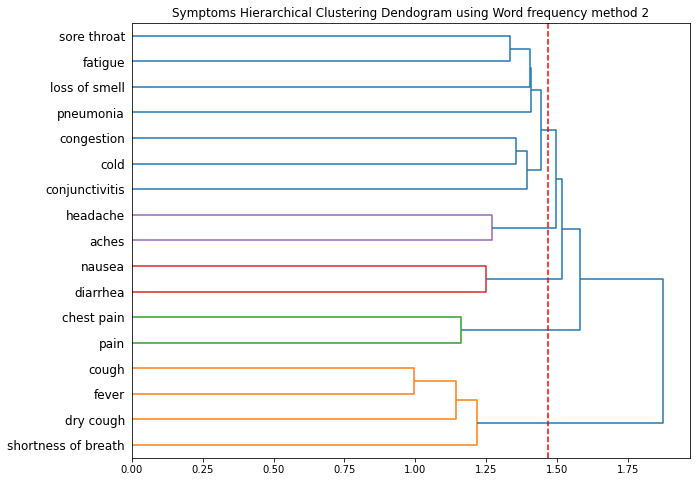

In [60]:
labelList = df_symptom.columns.values

plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axvline(x=1.47, color='r', linestyle='--')
plt.title("Symptoms Hierarchical Clustering Dendogram using Word frequency method 2")
plt.show()

The 5 clusters are made based on the above dendogram

In [61]:
# Here the Agglomerative clustering method is used as the Hierarchical clustering method
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist2)

array([0, 1, 3, 2, 3, 4, 0, 0, 1, 3, 4, 0, 3, 2, 0, 0, 0])

Text(0.5, 1.0, 'Symptoms scatter plot for heirarchical clustering method 2')

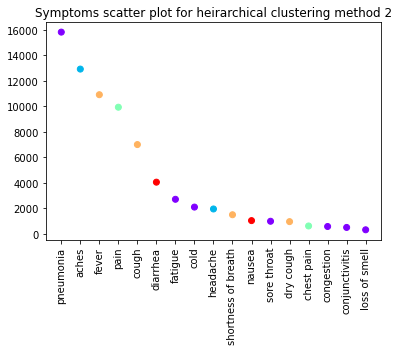

In [62]:
plt.scatter(symptom_df.index,symptom_df.values, c=cluster.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Symptoms scatter plot for heirarchical clustering method 2")

Using the 2nd method, more sensible clusters are observed as follows:

**Cluster 1**: Pneumonia, fatigue, cold, sore throat, congestion, conjunctivitis, loss of smell. These kinds of symptoms generally occur together as cold, pneumonia, sore throat and others are kind of connected to each other. 

**Cluster 2**: Aches, headache. It is clear that the pain like headache and other kinds are clustered together. 

**Cluster 3**: Pain, chest pain. Similar to cluster 2, here also the chest pain and other pains are clustered together. 

**Cluster 4**: Nausea, and diarrhea are clustered together which shows similar symptoms related to stomach. 

**Cluster 5**: Cough, fever, shortness of breath, dry cough. These symptoms relates to the breathing and cough situation which are the main impact in the coronavirus or COVID disease.

It can be infered that if one symptoms occur from one cluster then there are possibility to have another symptom from the same cluster. 

## K means clustering

### 1 - Word count method

In [63]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(sympt_dist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
print(kmeans.cluster_centers_)

[[14776.7        11875.7         9864.7         8883.7
   5951.7         3000.7         1656.7         1044.7
    926.3          654.5          470.5          460.3
    460.3          528.5          544.9          589.3
    737.3       ]
 [ 4568.66666667  1667.66666667   997.33333333  1324.33333333
   4256.33333333  7207.33333333  8551.33333333  9163.33333333
   9311.33333333  9764.33333333 10224.33333333 10275.33333333
  10304.33333333 10645.33333333 10686.33333333 10760.33333333
  10945.33333333]
 [    0.          2901.          4912.          5893.
   8825.         11776.         13120.         13732.
  13880.         14333.         14793.         14844.
  14873.         15214.         15255.         15329.
  15514.        ]
 [12448.          9547.          7536.          6555.
   3623.           672.           672.          1284.
   1432.          1885.          2345.          2396.
   2425.          2766.          2807.          2881.
   3066.        ]
 [ 8825.          5924.     

In [65]:
print(kmeans.labels_)


[2 1 1 1 4 3 3 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Symptoms scatter plot for K Means clustering method 1')

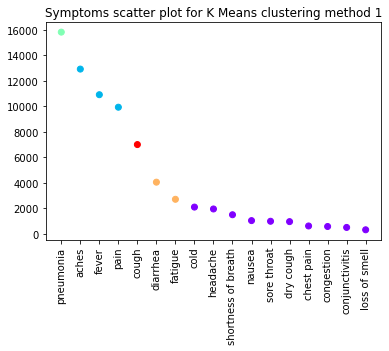

In [66]:
plt.scatter(symptom_df.index,symptom_df.values, c=kmeans.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Symptoms scatter plot for K Means clustering method 1")

Using the K means clustering for the 1st feature engineering method, the clusters observed are similar to the clusters observed in the Hierarchial Agglomerative clustering except the 'shortness of breath' which is in different cluster.

**Cluster 1**: Pnuemonia

**Cluster 2**: Aches, feveer, and pain

**Cluster 3**: Cough

**Cluster 4**: Diarrhea, fatigue, cold and headache

**Cluster 5**: Shortness of breadth, nausea, sore throat, dry cough, chest pain, congestion, conjunctivitis, loss of smell 


### 2 - Word frequency count Normalize method

In [67]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dist2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
print(kmeans.cluster_centers_)

[[0.98506805 0.99447885 0.93378612 0.94387938 0.94205859 0.44046426
  0.9698836  0.99376703 0.95620091 0.95557798 0.44046426 0.96013388
  0.96065108 0.98585001 0.9909686  0.99554022 0.99376079]
 [0.81485286 0.98974788 0.72027507 0.9670822  0.69148413 0.96563858
  0.7928256  0.98224865 0.94719142 0.75400329 0.95069265 0.78331106
  0.74152839 0.95254132 0.96909788 0.98816076 0.97896682]
 [0.98989887 0.99407995 0.97069376 0.98664063 0.96713788 0.99191601
  0.98832643 0.65205102 0.9880894  0.99145388 0.99493456 0.96273792
  0.98860161 0.99653847 0.63892376 0.65236068 0.99197528]
 [0.9797369  0.98834116 0.94698714 0.40952031 0.94803487 0.98391729
  0.97353627 0.98903382 0.9640409  0.94060452 0.9458121  0.96127089
  0.96851173 0.40952031 0.99165311 0.9940817  0.99656704]
 [0.98936372 0.63015499 0.95685347 0.97642037 0.96268143 0.9882066
  0.97443847 0.9913694  0.62231694 0.98131438 0.97475376 0.96289754
  0.97623194 0.98954569 0.98610385 0.99667138 0.65671179]]


In [69]:
print(kmeans.labels_)

[1 4 1 3 1 0 1 2 4 1 0 1 1 3 2 2 4]


Text(0.5, 1.0, 'Symptoms scatter plot for K Means clustering method 2')

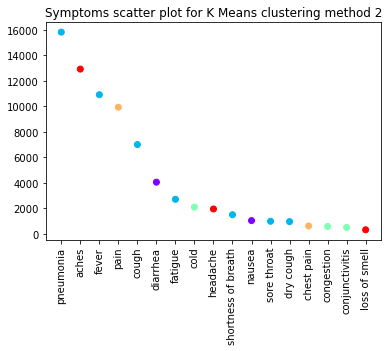

In [70]:
plt.scatter(symptom_df.index,symptom_df.values, c=kmeans.labels_, cmap='rainbow')
plt.xticks(rotation=90)
plt.title("Symptoms scatter plot for K Means clustering method 2")

Using K means clustering for 2nd feature engineering method, the clusters observed are as follows:

**Cluster 1**: Pneumonia, fever, cough, fatigue, shortness of breath, sore throat, dry cough. In this case, it makes more sense than the heirarchical clustering result. The symptoms mentioned in this clustered are much more related to the cough and breathing condition which have infection in the lungs like pnuemonia. Therefore, the ventilation and other medication related to breathing problem may be more effective. 

**Cluster 2**: Aches, headache. These two symptoms generally occurs together. 

**Cluster 3**: Pain, chest pain. These two symptoms also generraly occurs together. 

**Cluster 4**: Diarrhea, nausea. These two symptoms are related to issues of stomach and makes sense that this affect the digestion system. Therefore, medication related to the stomach issues may be provided to relief COVID symptoms. 

**Cluster 5**: Cold, Congestion, conjunctivitis, loss of smell. These are common issues related to cold situation and sinus issues. It affects the smell as due to cold, the sense of smelling get affected drastically. 

The K-means clustering using 2nd feature engineering method makes more sense for the symptom analysis. 

# Final Conclusion

### Transmission Mode

The **Hierarchical Clustering** using the **Agglomerative clustering** with the 2nd feature engineering method of word frequency count method gives the superior result for analysing the transmission mode of the COVID virus. Also, the analysis makes more sense regarding the spreading and gives insights to prevent the spread.  

### Symptoms

The **K Means Clustering** using the 2nd feature engineering method gives the superior result for the insights of the symptoms of COVID. 